In [4]:
 !pip install albumentations==0.4.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65173 sha256=3c1f5f29e4e2bb4eb4bba1a198f5dcaf7ae843627f602cf0ab624376a6e752f4
  Stored in directory: /root/.cache/pip/wheels/d2/e3/0b/99a239413035502833a7b07283894243fddf5ce3aa720ca8dd
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [5]:
!git clone https://github.com/dine1717/EV8.git

Cloning into 'EV8'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 2), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (86/86), 1.30 MiB | 6.33 MiB/s, done.


In [6]:

import torchvision

from IPython.display import clear_output
import shutil
import  os
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import cv2
os.chdir('/content/')
shutil.rmtree('EV8')
import warnings
warnings.filterwarnings('ignore')
import pickle
# os.chdir('/content/')

In [7]:
!git clone --branch Session7 https://github.com/dine1717/EV8.git

Cloning into 'EV8'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 2), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (86/86), 1.30 MiB | 9.17 MiB/s, done.


In [8]:
%cd EV8/"main and utils"
import main2
from main2 import *
import models
from models import *
import resnet_cam
from resnet_cam import *
import show_cam_bharath_manu_dinesh_sab
from show_cam_bharath_manu_dinesh_sab import *
resnet = ResNet18()
     

/content/EV8/main and utils


In [9]:
trainloader, testloader = generate_dataset()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/data/cifar10/cifar-10-python.tar.gz to /root/data/cifar10
Files already downloaded and verified


In [10]:
testloader.dataset.class_to_idx
class_dictionary = {}
for key,value in testloader.dataset.class_to_idx.items():
    class_dictionary[value] = key
class_dictionary

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [11]:
my_model = generate_model(resnet)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

In [12]:
import train_test
from train_test import *
optimizer, scheduler =  create_optim(my_model,trainloader)
     

In [13]:

epochs = 40
device = 'cuda'
for epoch in range(epochs):
    print("EPOCH:", epoch)
    train(my_model,trainloader, optimizer,device,scheduler)
    test(my_model, testloader,device)

EPOCH: 0
391


Loss=1.9089601039886475 Batch_id=390 Accuracy=22.95: 100%|██████████| 391/391 [00:46<00:00,  8.37it/s]



Test set: Average loss: 1.7830, Accuracy: 3363/10000 (33.63%)

EPOCH: 1
391


Loss=1.7970497608184814 Batch_id=390 Accuracy=36.34: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 1.7761, Accuracy: 3662/10000 (36.62%)

EPOCH: 2
391


Loss=1.5076158046722412 Batch_id=390 Accuracy=45.32: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 1.3251, Accuracy: 5059/10000 (50.59%)

EPOCH: 3
391


Loss=1.1414839029312134 Batch_id=390 Accuracy=51.29: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]



Test set: Average loss: 1.2180, Accuracy: 5602/10000 (56.02%)

EPOCH: 4
391


Loss=1.1432654857635498 Batch_id=390 Accuracy=56.98: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 1.2924, Accuracy: 5204/10000 (52.04%)

EPOCH: 5
391


Loss=1.1267629861831665 Batch_id=390 Accuracy=61.75: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 1.0185, Accuracy: 6333/10000 (63.33%)

EPOCH: 6
391


Loss=0.8564015626907349 Batch_id=390 Accuracy=65.78: 100%|██████████| 391/391 [00:46<00:00,  8.41it/s]



Test set: Average loss: 0.9647, Accuracy: 6602/10000 (66.02%)

EPOCH: 7
391


Loss=0.9775265455245972 Batch_id=390 Accuracy=68.36: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.8689, Accuracy: 6939/10000 (69.39%)

EPOCH: 8
391


Loss=1.0046734809875488 Batch_id=390 Accuracy=71.47: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.7790, Accuracy: 7253/10000 (72.53%)

EPOCH: 9
391


Loss=0.6198345422744751 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.7005, Accuracy: 7525/10000 (75.25%)

EPOCH: 10
391


Loss=0.5653221607208252 Batch_id=390 Accuracy=76.22: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]



Test set: Average loss: 0.6922, Accuracy: 7648/10000 (76.48%)

EPOCH: 11
391


Loss=0.7335280179977417 Batch_id=390 Accuracy=78.55: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.6738, Accuracy: 7722/10000 (77.22%)

EPOCH: 12
391


Loss=0.49961695075035095 Batch_id=390 Accuracy=80.41: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.6068, Accuracy: 7939/10000 (79.39%)

EPOCH: 13
391


Loss=0.8233084678649902 Batch_id=390 Accuracy=82.09: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.6715, Accuracy: 7736/10000 (77.36%)

EPOCH: 14
391


Loss=0.6881166100502014 Batch_id=390 Accuracy=83.63: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.5977, Accuracy: 7994/10000 (79.94%)

EPOCH: 15
391


Loss=0.5621767044067383 Batch_id=390 Accuracy=85.14: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.6000, Accuracy: 8025/10000 (80.25%)

EPOCH: 16
391


Loss=0.423004150390625 Batch_id=390 Accuracy=86.41: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.5596, Accuracy: 8170/10000 (81.70%)

EPOCH: 17
391


Loss=0.33355557918548584 Batch_id=390 Accuracy=88.14: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]



Test set: Average loss: 0.6253, Accuracy: 8026/10000 (80.26%)

EPOCH: 18
391


Loss=0.15539710223674774 Batch_id=390 Accuracy=88.85: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]



Test set: Average loss: 0.5985, Accuracy: 8148/10000 (81.48%)

EPOCH: 19
391


Loss=0.508043646812439 Batch_id=390 Accuracy=90.32: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]



Test set: Average loss: 0.6397, Accuracy: 8129/10000 (81.29%)

EPOCH: 20
391


Loss=0.3501341640949249 Batch_id=390 Accuracy=90.99: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.6830, Accuracy: 7972/10000 (79.72%)

EPOCH: 21
391


Loss=0.14312061667442322 Batch_id=390 Accuracy=92.26: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.5859, Accuracy: 8296/10000 (82.96%)

EPOCH: 22
391


Loss=0.15312734246253967 Batch_id=390 Accuracy=92.88: 100%|██████████| 391/391 [00:46<00:00,  8.41it/s]



Test set: Average loss: 0.6694, Accuracy: 8174/10000 (81.74%)

EPOCH: 23
391


Loss=0.17233799397945404 Batch_id=390 Accuracy=93.46: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.7337, Accuracy: 8012/10000 (80.12%)

EPOCH: 24
391


Loss=0.10973837226629257 Batch_id=390 Accuracy=94.23: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.6326, Accuracy: 8251/10000 (82.51%)

EPOCH: 25
391


Loss=0.2251635044813156 Batch_id=390 Accuracy=95.05: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]



Test set: Average loss: 0.6280, Accuracy: 8298/10000 (82.98%)

EPOCH: 26
391


Loss=0.23732450604438782 Batch_id=390 Accuracy=95.04: 100%|██████████| 391/391 [00:46<00:00,  8.37it/s]



Test set: Average loss: 0.6605, Accuracy: 8246/10000 (82.46%)

EPOCH: 27
391


Loss=0.21364934742450714 Batch_id=390 Accuracy=95.47: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]



Test set: Average loss: 0.6706, Accuracy: 8231/10000 (82.31%)

EPOCH: 28
391


Loss=0.16611604392528534 Batch_id=390 Accuracy=95.77: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.7160, Accuracy: 8182/10000 (81.82%)

EPOCH: 29
391


Loss=0.1434440314769745 Batch_id=390 Accuracy=96.38: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]



Test set: Average loss: 0.6912, Accuracy: 8224/10000 (82.24%)

EPOCH: 30
391


Loss=0.08858440816402435 Batch_id=390 Accuracy=96.80: 100%|██████████| 391/391 [00:46<00:00,  8.41it/s]



Test set: Average loss: 0.6628, Accuracy: 8310/10000 (83.10%)

EPOCH: 31
391


Loss=0.27014315128326416 Batch_id=390 Accuracy=96.67: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.7365, Accuracy: 8257/10000 (82.57%)

EPOCH: 32
391


Loss=0.11605106294155121 Batch_id=390 Accuracy=97.04: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.6712, Accuracy: 8382/10000 (83.82%)

EPOCH: 33
391


Loss=0.16938196122646332 Batch_id=390 Accuracy=96.97: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.6926, Accuracy: 8318/10000 (83.18%)

EPOCH: 34
391


Loss=0.0859975516796112 Batch_id=390 Accuracy=97.14: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.6971, Accuracy: 8312/10000 (83.12%)

EPOCH: 35
391


Loss=0.06511737406253815 Batch_id=390 Accuracy=97.58: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]



Test set: Average loss: 0.6791, Accuracy: 8413/10000 (84.13%)

EPOCH: 36
391


Loss=0.06476916372776031 Batch_id=390 Accuracy=97.63: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]



Test set: Average loss: 0.6599, Accuracy: 8395/10000 (83.95%)

EPOCH: 37
391


Loss=0.10159572213888168 Batch_id=390 Accuracy=97.69: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



Test set: Average loss: 0.7058, Accuracy: 8381/10000 (83.81%)

EPOCH: 38
391


Loss=0.05470705032348633 Batch_id=390 Accuracy=97.73: 100%|██████████| 391/391 [00:46<00:00,  8.35it/s]



Test set: Average loss: 0.7442, Accuracy: 8306/10000 (83.06%)

EPOCH: 39
391


Loss=0.09057705104351044 Batch_id=390 Accuracy=97.85: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



Test set: Average loss: 0.7249, Accuracy: 8309/10000 (83.09%)



In [14]:

new_train_acc = []
i = 1
for value in range(1,41):    
    a = i+391
    new_train_acc.append(sum(train_acc[i:a])/len(train_acc[i:a]))
    i = a

TypeError: ignored

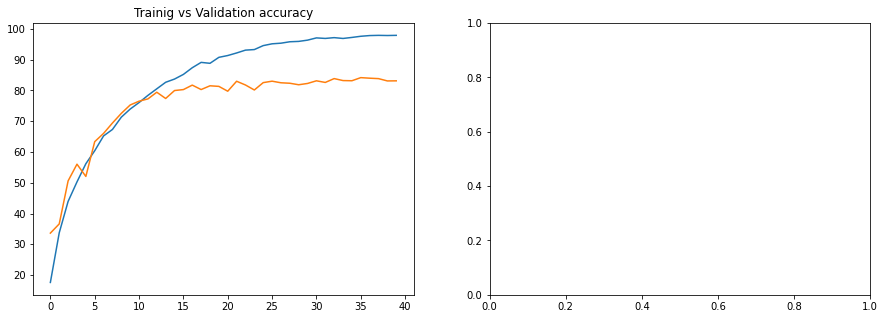

In [15]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(new_train_acc, label = 'train_acc')
plt.plot(test_acc, label = 'val_acc')
plt.title('Trainig vs Validation accuracy')

plt.subplot(1,2,2)
plt.plot(train_losses, label = 'train_losses')
plt.plot(test_losses, label = 'val losses')
plt.title('Trainig vs Validation loss')

plt.legend(loc = 'best')
plt.show()

In [16]:
import pickle

In [17]:

filename = 'finalized_model_40.sav'
pickle.dump(my_model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
     

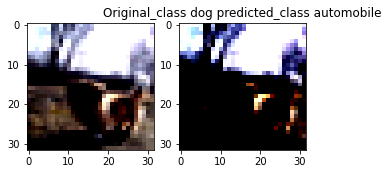

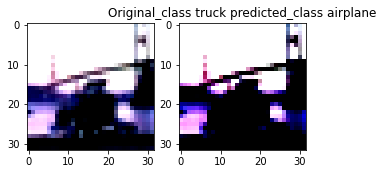

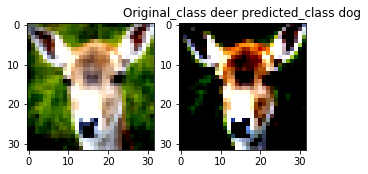

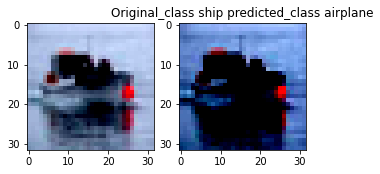

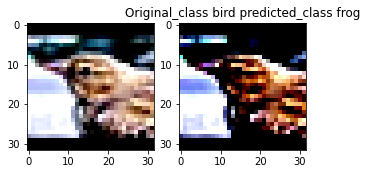

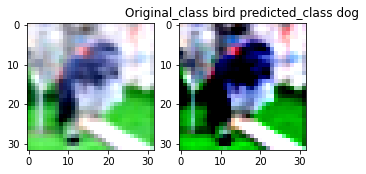

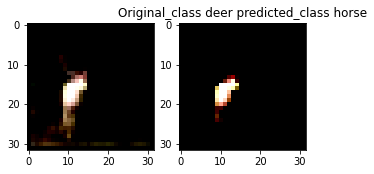

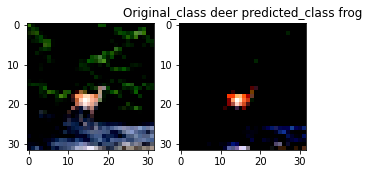

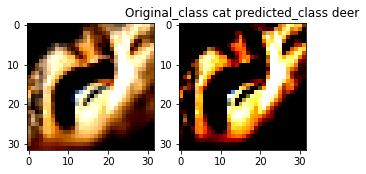

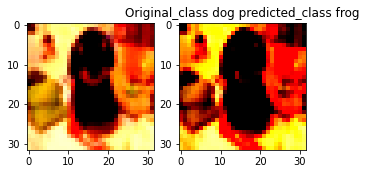

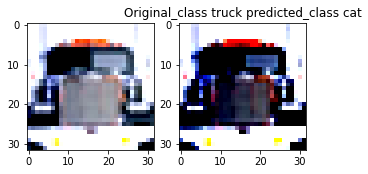

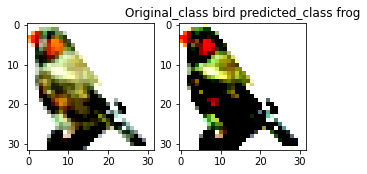

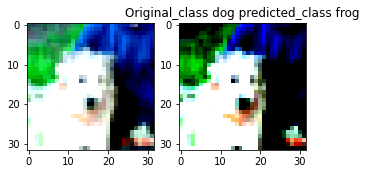

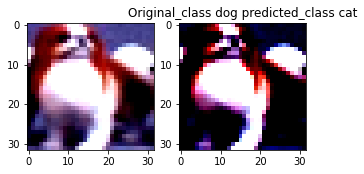

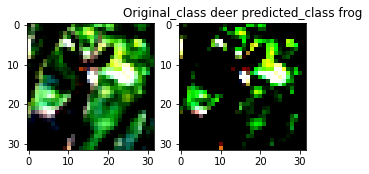

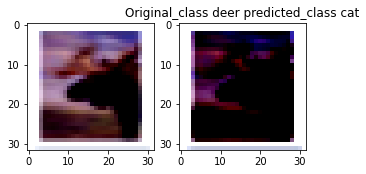

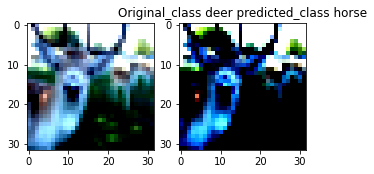

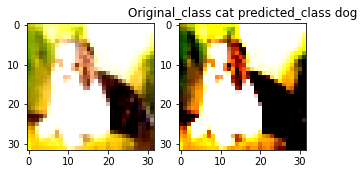

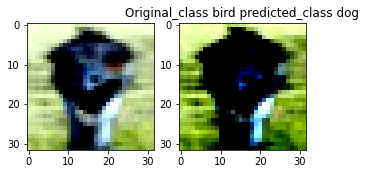

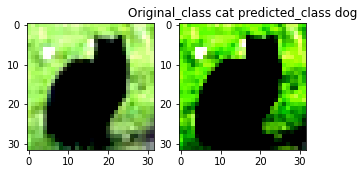

In [21]:

activated_mod = ResNet_Mod(loaded_model)
get_true_pred(testloader,activated_mod,20,class_dictionary,0.0001)
     